In [1]:
#!pip install tqdm
import numpy as np
import math
import pandas as pd
import os
import time
from tqdm import tqdm

In [2]:
import math

# 점과 점 사이의 거리 구하는 함수
def distance(x1, y1, x2, y2):
    result = math.sqrt( math.pow(x1 - x2, 2) + math.pow(y1 - y2, 2))
    return result

In [3]:
all_cafe = pd.read_excel('C:/Users/lee/photo/(클러스터링)커피프린스/커피프린스_동국대점조_code&data/Data/군집화 전 진짜 최종 0822.xlsx')

In [4]:
all_cafe.head()

,gid,pop,layer,adm_dr_cd,adm_dr_nm,objectid,8_num,living_pop,floating_pop,area_sum,review_visitor,blog_visitor,avg_sal_sum,x_coord,y_coord,num_point
0,다사585452,21,강남구,1123064,역삼1동,366,11680640,2622.636,18.164,372.34,482,34,2220000.000,127.031022,37.505592,3
1,다사583456,440,강남구,1123052,논현1동,360,11680521,20072.545,117.325,29.70,60,2,569333.333,127.028737,37.509188,1
2,다사597458,62,강남구,1123059,삼성2동,363,11680590,1938.262,12.312,25.90,404,36,811000.000,127.044566,37.511053,1
3,다사584464,23,강남구,1123053,논현2동,361,11680531,1070.405,8.640,45.86,2,4,580000.000,127.030032,37.516449,1
4,다사579456,366,강남구,1123052,논현1동,360,11680521,16903.196,98.800,113.85,214,13,1707999.999,127.024211,37.509170,3


In [5]:
# 해당 구 뽑아오기        !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 구 바꾸기 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

gu_cafe = all_cafe[all_cafe['layer'] == '강남구']

In [6]:
gu_cafe.head()

,gid,pop,layer,adm_dr_cd,adm_dr_nm,objectid,8_num,living_pop,floating_pop,area_sum,review_visitor,blog_visitor,avg_sal_sum,x_coord,y_coord,num_point
0,다사585452,21,강남구,1123064,역삼1동,366,11680640,2622.636,18.164,372.34,482,34,2220000.000,127.031022,37.505592,3
1,다사583456,440,강남구,1123052,논현1동,360,11680521,20072.545,117.325,29.70,60,2,569333.333,127.028737,37.509188,1
2,다사597458,62,강남구,1123059,삼성2동,363,11680590,1938.262,12.312,25.90,404,36,811000.000,127.044566,37.511053,1
3,다사584464,23,강남구,1123053,논현2동,361,11680531,1070.405,8.640,45.86,2,4,580000.000,127.030032,37.516449,1
4,다사579456,366,강남구,1123052,논현1동,360,11680521,16903.196,98.800,113.85,214,13,1707999.999,127.024211,37.509170,3


In [7]:
# 구 군집화한 것들 들고오기                            !!!!!!!!!!!!!!!!!!!!!!!!!!!! 파일 들고오기 !!!!!!!!!!!!!!!!!!!!!!!!!

gu_grid = pd.read_csv('C:/Users/lee/photo/(클러스터링)커피프린스/커피프린스_동국대점조_code&data/Data/구별 그리드/강남구 그리드.csv', encoding='utf-8')

In [8]:
gu_grid.head()

,gid,강남구
0,다사597458,0
1,다사596459,0
2,다사594467,0
3,다사590465,0
4,다사592464,0


In [9]:
gu_grid['강남구'].unique()    # 해당 구에 군집이 몇개 인지 확인

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [10]:
# 해당 구 카페 그리드와 카페를 군집한 그리드 합치기

rlst= pd.merge(gu_cafe,gu_grid, how= 'left', on='gid')
rlst.head()

,gid,pop,layer,adm_dr_cd,adm_dr_nm,objectid,8_num,living_pop,floating_pop,area_sum,review_visitor,blog_visitor,avg_sal_sum,x_coord,y_coord,num_point,강남구
0,다사585452,21,강남구,1123064,역삼1동,366,11680640,2622.636,18.164,372.34,482,34,2220000.000,127.031022,37.505592,3,6
1,다사583456,440,강남구,1123052,논현1동,360,11680521,20072.545,117.325,29.70,60,2,569333.333,127.028737,37.509188,1,6
2,다사597458,62,강남구,1123059,삼성2동,363,11680590,1938.262,12.312,25.90,404,36,811000.000,127.044566,37.511053,1,0
3,다사584464,23,강남구,1123053,논현2동,361,11680531,1070.405,8.640,45.86,2,4,580000.000,127.030032,37.516449,1,5
4,다사579456,366,강남구,1123052,논현1동,360,11680521,16903.196,98.800,113.85,214,13,1707999.999,127.024211,37.509170,3,6


In [11]:
# 해당 구 클러스터 설정      !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!클러스터 바꿔주기 !!!!!!!!!!!!!!!!!!!

gid =rlst[rlst['강남구'] == 0]
gid.reset_index(drop=True, inplace=True)
gid.head()

,gid,pop,layer,adm_dr_cd,adm_dr_nm,objectid,8_num,living_pop,floating_pop,area_sum,review_visitor,blog_visitor,avg_sal_sum,x_coord,y_coord,num_point,강남구
0,다사597458,62,강남구,1123059,삼성2동,363,11680590,1938.262,12.312,25.90,404,36,811000.000,127.044566,37.511053,1,0
1,다사596459,113,강남구,1123059,삼성2동,363,11680590,3876.523,24.624,146.00,139,5,811000.000,127.043606,37.511983,1,0
2,다사594467,101,강남구,1123078,청담동,378,11680565,4164.911,39.244,184.89,275,856,1312666.666,127.041141,37.519164,2,0
3,다사590465,147,강남구,1123053,논현2동,361,11680531,6422.432,51.840,175.55,1526,706,580000.000,127.036607,37.517332,1,0
4,다사592464,11,강남구,1123053,논현2동,361,11680531,0.000,0.000,150.57,2880,144,580000.000,127.038876,37.516439,1,0


In [12]:
cafe_x = []
cafe_y = []

for i in range(len(gid)):
    cafe_x.append(gid.iloc[i][13])
    cafe_y.append(gid.iloc[i][14])
    
dis = []

for i in range(len(cafe_x)):
    for j in range(len(cafe_x)):
        dis.append(distance(cafe_x[i], cafe_y[i], cafe_x[j], cafe_y[j]))
        
num = round(max(dis) / 0.007882882) # 해당 군집을 재군집 할 때 군집 개수
num

3

In [13]:
max(dis)

0.026282511884269746

In [14]:
# 재 군집 !!!!!!

new_gid = gid.iloc[:, [13, 14]]
new_gid.head()

,x_coord,y_coord
0,127.044566,37.511053
1,127.043606,37.511983
2,127.041141,37.519164
3,127.036607,37.517332
4,127.038876,37.516439


In [15]:
# 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(new_gid)

In [16]:
minmax_gid = pd.DataFrame(scaled)
minmax_gid.columns=new_gid.columns
minmax_gid.head()

,x_coord,y_coord
0,0.305784,0.053587
1,0.268921,0.107822
2,0.174301,0.526569
3,0.000214,0.419741
4,0.087312,0.367693


In [17]:
# 필요한 모듈
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import sklearn
%matplotlib inline

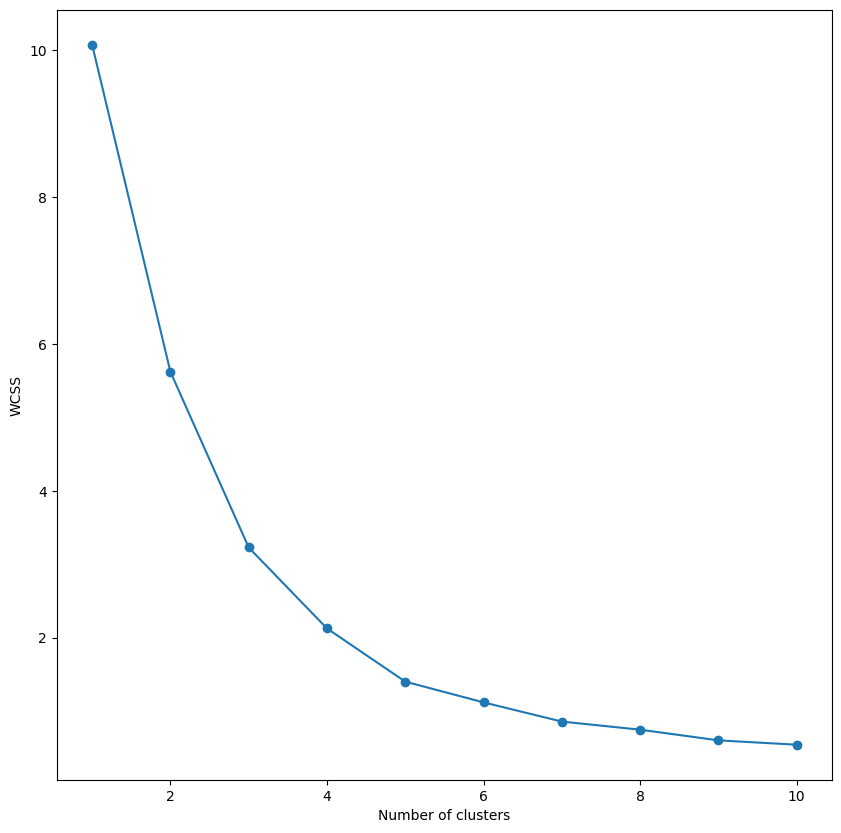

In [18]:
# Elbow method2
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters = i, init = "k-means++")
    model.fit(minmax_gid)
    wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
from sklearn.decomposition import PCA

# 차원축소
pca = PCA(2)
data = pca.fit_transform(minmax_gid)

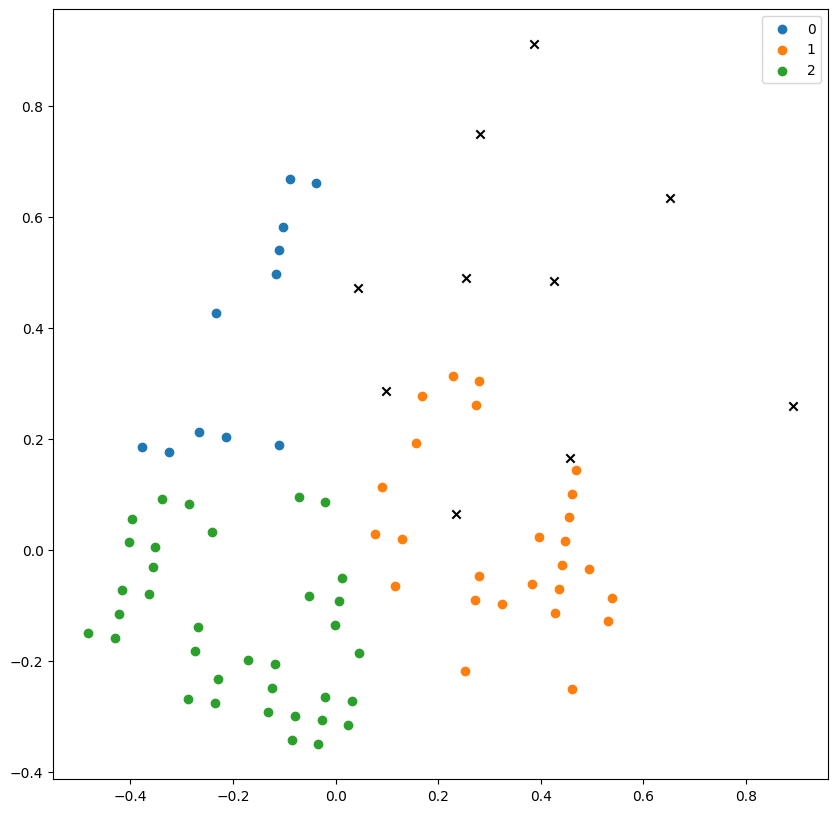

In [20]:
# 군집화 결과
centers = np.array(model.cluster_centers_)
model = KMeans(n_clusters = num, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [21]:
model.inertia_

3.227514354769381

In [22]:
cluster = pd.Series(label)

In [23]:
cluster

0     2
1     2
2     2
3     2
4     2
     ..
67    2
68    1
69    1
70    2
71    1
Length: 72, dtype: int32

In [24]:
minmax_gid = minmax_gid.reset_index()

In [25]:
minmax_gid = minmax_gid.drop(['index'], axis=1)

In [26]:
new_cluster = pd.concat([minmax_gid, cluster], axis=1)
new_cluster.head()

,x_coord,y_coord,0
0,0.305784,0.053587,2
1,0.268921,0.107822,2
2,0.174301,0.526569,2
3,0.000214,0.419741,2
4,0.087312,0.367693,2


In [27]:
new_cluster.columns = ['x_coord', 'y_coord', 'cluster']
new_cluster.head()

,x_coord,y_coord,cluster
0,0.305784,0.053587,2
1,0.268921,0.107822,2
2,0.174301,0.526569,2
3,0.000214,0.419741,2
4,0.087312,0.367693,2


In [28]:
gid.head()

,gid,pop,layer,adm_dr_cd,adm_dr_nm,objectid,8_num,living_pop,floating_pop,area_sum,review_visitor,blog_visitor,avg_sal_sum,x_coord,y_coord,num_point,강남구
0,다사597458,62,강남구,1123059,삼성2동,363,11680590,1938.262,12.312,25.90,404,36,811000.000,127.044566,37.511053,1,0
1,다사596459,113,강남구,1123059,삼성2동,363,11680590,3876.523,24.624,146.00,139,5,811000.000,127.043606,37.511983,1,0
2,다사594467,101,강남구,1123078,청담동,378,11680565,4164.911,39.244,184.89,275,856,1312666.666,127.041141,37.519164,2,0
3,다사590465,147,강남구,1123053,논현2동,361,11680531,6422.432,51.840,175.55,1526,706,580000.000,127.036607,37.517332,1,0
4,다사592464,11,강남구,1123053,논현2동,361,11680531,0.000,0.000,150.57,2880,144,580000.000,127.038876,37.516439,1,0


In [29]:
new_cluster['gid'] = gid['gid']
new_cluster['pop'] = gid['pop']
new_cluster['living_pop'] = gid['living_pop']
new_cluster['floating_pop'] = gid['floating_pop']
new_cluster['area_sum'] = gid['area_sum']
new_cluster['review_visitor'] = gid['review_visitor']
new_cluster['blog_visitor'] = gid['blog_visitor']
new_cluster['avg_sal_sum'] = gid['avg_sal_sum']
new_cluster['x_coord_1'] = gid['x_coord']
new_cluster['y_coord_1'] = gid['y_coord']
new_cluster['num_point'] = gid['num_point']
new_cluster.head()

,x_coord,y_coord,cluster,gid,pop,living_pop,floating_pop,area_sum,review_visitor,blog_visitor,avg_sal_sum,x_coord_1,y_coord_1,num_point
0,0.305784,0.053587,2,다사597458,62,1938.262,12.312,25.90,404,36,811000.000,127.044566,37.511053,1
1,0.268921,0.107822,2,다사596459,113,3876.523,24.624,146.00,139,5,811000.000,127.043606,37.511983,1
2,0.174301,0.526569,2,다사594467,101,4164.911,39.244,184.89,275,856,1312666.666,127.041141,37.519164,2
3,0.000214,0.419741,2,다사590465,147,6422.432,51.840,175.55,1526,706,580000.000,127.036607,37.517332,1
4,0.087312,0.367693,2,다사592464,11,0.000,0.000,150.57,2880,144,580000.000,127.038876,37.516439,1


In [30]:
# 뉴 클러스터의 클러스터 불러오기

test = new_cluster[new_cluster['cluster'] == 0]
test.reset_index(drop=True, inplace=True)
test.head()

,x_coord,y_coord,cluster,gid,pop,living_pop,floating_pop,area_sum,review_visitor,blog_visitor,avg_sal_sum,x_coord_1,y_coord_1,num_point
0,0.521940,0.317674,0,다사602463,538,16475.224,104.652,80.56,122,31,8.110000e+05,127.050197,37.515582,1
1,0.522356,0.212545,0,다사602461,708,21320.879,135.432,334.39,2636,56,1.622000e+06,127.050207,37.513779,2
2,0.479331,0.107164,0,다사601459,92,2907.393,18.468,26.62,54,7,8.110000e+05,127.049087,37.511972,1
3,0.479540,0.054600,0,다사601458,277,8722.178,55.404,23.60,34,56,8.110000e+05,127.049092,37.511071,1
4,0.739763,0.161229,0,다사607460,168,11589.201,103.103,1814.72,23702,1799,1.199333e+07,127.055870,37.512899,14


In [31]:
# 그리드 별 minmax 해서 가중치 계싼하기

test_w = test.iloc[:, [4, 5, 6, 7, 8, 9, 10]]
test_w.head()

,pop,living_pop,floating_pop,area_sum,review_visitor,blog_visitor,avg_sal_sum
0,538,16475.224,104.652,80.56,122,31,8.110000e+05
1,708,21320.879,135.432,334.39,2636,56,1.622000e+06
2,92,2907.393,18.468,26.62,54,7,8.110000e+05
3,277,8722.178,55.404,23.60,34,56,8.110000e+05
4,168,11589.201,103.103,1814.72,23702,1799,1.199333e+07


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(test_w)

weight = pd.DataFrame(scaled)
weight.columns=test_w.columns
weight.head()

,pop,living_pop,floating_pop,area_sum,review_visitor,blog_visitor,avg_sal_sum
0,0.756795,0.542134,0.376491,0.031801,0.004139,0.017232,0.000000
1,1.000000,0.712478,0.498117,0.173517,0.110313,0.031128,0.072525
2,0.118741,0.065170,0.035939,0.001686,0.001267,0.003891,0.000000
3,0.383405,0.269583,0.181890,0.000000,0.000422,0.031128,0.000000
4,0.227468,0.370370,0.370370,1.000000,1.000000,1.000000,1.000000


In [33]:
weight['all_sum'] = weight.sum(axis=1)

In [34]:
weight.head()

,pop,living_pop,floating_pop,area_sum,review_visitor,blog_visitor,avg_sal_sum,all_sum
0,0.756795,0.542134,0.376491,0.031801,0.004139,0.017232,0.000000,1.728592
1,1.000000,0.712478,0.498117,0.173517,0.110313,0.031128,0.072525,2.598079
2,0.118741,0.065170,0.035939,0.001686,0.001267,0.003891,0.000000,0.226693
3,0.383405,0.269583,0.181890,0.000000,0.000422,0.031128,0.000000,0.866428
4,0.227468,0.370370,0.370370,1.000000,1.000000,1.000000,1.000000,4.968209


In [35]:
rlst = test.iloc[:, [3, 2,  11, 12, 13]]
rlst.head()

,gid,cluster,x_coord_1,y_coord_1,num_point
0,다사602463,0,127.050197,37.515582,1
1,다사602461,0,127.050207,37.513779,2
2,다사601459,0,127.049087,37.511972,1
3,다사601458,0,127.049092,37.511071,1
4,다사607460,0,127.055870,37.512899,14


In [36]:
# 군집된 카페 그리드에서 가중치 합치기

rlst = pd.concat([rlst,weight['all_sum']],axis=1)
rlst.head()

,gid,cluster,x_coord_1,y_coord_1,num_point,all_sum
0,다사602463,0,127.050197,37.515582,1,1.728592
1,다사602461,0,127.050207,37.513779,2,2.598079
2,다사601459,0,127.049087,37.511972,1,0.226693
3,다사601458,0,127.049092,37.511071,1,0.866428
4,다사607460,0,127.055870,37.512899,14,4.968209


In [37]:
rlst['weight'] = rlst[['num_point', 'all_sum']].sum(axis=1)
rlst.head()   # 최종 데이터 프레임

,gid,cluster,x_coord_1,y_coord_1,num_point,all_sum,weight
0,다사602463,0,127.050197,37.515582,1,1.728592,2.728592
1,다사602461,0,127.050207,37.513779,2,2.598079,4.598079
2,다사601459,0,127.049087,37.511972,1,0.226693,1.226693
3,다사601458,0,127.049092,37.511071,1,0.866428,1.866428
4,다사607460,0,127.055870,37.512899,14,4.968209,18.968209


In [38]:
candi_grid = pd.read_csv('C:/Users/lee/photo/(클러스터링)커피프린스/커피프린스_동국대점조_code&data/Data/구별 포인트/강남구 포인트.csv', encoding='utf-8')
candi_grid = candi_grid[candi_grid['NUMPOINTS'] == 0]
candi_grid = candi_grid.iloc[:, [0, 16, 17]]
candi_grid = candi_grid.reset_index()
candi_grid = candi_grid.drop(['index'], axis=1)
candi_grid.head()

,gid,xcoord,ycoord
0,다사579454,127.024223,37.507368
1,다사595438,127.042358,37.493163
2,다사595438,127.042520,37.492737
3,다사584464,127.029493,37.516332
4,다사587471,127.033178,37.522726


In [39]:
candidate_x = []
candidate_y = []
candidate_i = []

for i in range(len(candi_grid)):
    candidate_x.append(candi_grid.loc[i][1])
    candidate_y.append(candi_grid.loc[i][2])
    candidate_i.append(candi_grid.loc[i][0])

In [40]:
candidate_i

['다사579454',
 '다사595438',
 '다사595438',
 '다사584464',
 '다사587471',
 '다사581459',
 '다사592435',
 '다사596460',
 '다사596460',
 '다사647409',
 '다사648409',
 '다사593437',
 '다사593437',
 '다사608451',
 '다사618440',
 '다사596442',
 '다사596459',
 '다사611446',
 '다사646408',
 '다사644431',
 '다사618444',
 '다사611467',
 '다사607421',
 '다사609442',
 '다사594467',
 '다사606450',
 '다사584455',
 '다사579463',
 '다사589439',
 '다사603422',
 '다사599478',
 '다사585440',
 '다사629427',
 '다사633440',
 '다사604424',
 '다사582478',
 '다사582478',
 '다사605454',
 '다사618428',
 '다사623437',
 '다사623437',
 '다사610428',
 '다사610428',
 '다사609450',
 '다사609450',
 '다사616458',
 '다사647426',
 '다사575465',
 '다사582480',
 '다사650412',
 '다사588433',
 '다사582472',
 '다사608440',
 '다사594432',
 '다사586440',
 '다사588435',
 '다사588435',
 '다사615446',
 '다사614436',
 '다사587440',
 '다사596465',
 '다사587447',
 '다사648433',
 '다사649409',
 '다사600442',
 '다사597461',
 '다사610464',
 '다사648404',
 '다사636425',
 '다사612462',
 '다사604417',
 '다사601439',
 '다사586466',
 '다사587434',
 '다사587434',
 '다사604474',
 '다사611453',

In [41]:
rlst

,gid,cluster,x_coord_1,y_coord_1,num_point,all_sum,weight
0,다사602463,0,127.050197,37.515582,1,1.728592,2.728592
1,다사602461,0,127.050207,37.513779,2,2.598079,4.598079
2,다사601459,0,127.049087,37.511972,1,0.226693,1.226693
3,다사601458,0,127.049092,37.511071,1,0.866428,1.866428
4,다사607460,0,127.055870,37.512899,14,4.968209,18.968209
5,다사613462,0,127.062649,37.514727,1,1.669931,2.669931
6,다사613463,0,127.062644,37.515628,1,2.617292,3.617292
7,다사602460,0,127.050213,37.512878,1,0.533970,1.533970
8,다사611462,0,127.060386,37.514719,1,0.787694,1.787694
9,다사610462,0,127.059254,37.514714,1,0.243751,1.243751


In [42]:
cafe_x = []
cafe_y = []
cafe_w = []

for i in range(len(rlst)):
    cafe_x.append(rlst.iloc[i][2])
    cafe_y.append(rlst.iloc[i][3])
    cafe_w.append(rlst.iloc[i][6])

In [43]:
cafe_w

[2.7285924681828977,
 4.598079441541914,
 1.2266933405567806,
 1.8664281426462317,
 18.968208537577517,
 2.6699308661714856,
 3.617292244670559,
 1.5339701261958878,
 1.7876939213932364,
 1.2437506851863638,
 1.0086011063196216]

In [44]:
zip(cafe_x, cafe_y, cafe_w)

In [45]:
dtc = sum([distance(x, y, candidate_x[0], candidate_y[0])*w for x, y, w in zip(cafe_x, cafe_y, cafe_w)])

for i in range(len(candidate_x)):
    dist = sum([distance(x, y, candidate_x[i], candidate_y[i])*w for x, y, w in zip(cafe_x, cafe_y, cafe_w)])
    if dist < dtc:
        dtc = dist
        idx = i

In [46]:
dtc

0.15460576249057462

In [47]:
candidate_i[idx]

'다사606460'